## The biased-persistent random walk

Weavers *et al* model leukocytes as migrating towards the wound by means of a *biased-persistent* random walk. The terms 'bias' and 'persistence' refer to two distinct phenomena observed in cell migration. Cells with a high bias have a strong tendency to drift towards a static global position, and cells with a high persistence tend to take successive steps that are oriented in the same general direction.

<br>

Mathematically, the model is formulated as follows. A cell is defined by three parameters $w$, $p$ and $b$, each of which take a value on the interval $[0, 1]$. The cell exists in an environment of two dimensional Euclidean space and its state, at any one time, is simply its $x$-$y$ coordinates. At each discretised time step, the cell makes a jump of length $s_t$, at an angle $\alpha_t$ defined with reference to an arbitrary fixed axis. The step size $s_t$ is generated by drawing from a *truncated normal* distribution, with a probability density function

<br>

$$
\mathcal{N}^{+}(s_t;  \, \sigma) =
\begin{cases}
0 & \text{if} \,\, s_t < 0 \\
2 \, \mathcal{N}(s_t; \, 0, \, \sigma) & \text{if} \,\, s_t \geq . 0\\
\end{cases}
$$

<br>

The turning angle $\alpha_t$ is drawn from a distribution that depends on the current angle towards the source $\beta_t$, and the previous angle $\alpha_{t-1}$. At each step, the cell chooses to follow either biased motion, with probability $w$, or persistent motion, with probability $1-w$. The turning angle is then drawn from a \emph{wrapped normal} distribution $\mathcal{N}_{\,\,\,\text{w}}(\theta; \, \mu, \, \sigma)$. The probability density function for this distribution is defined as

<br>

$$
\mathcal{N}_{\text{w}}(\theta; \, \mu, \, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \sum_{k=-\infty}^{\infty} \exp \big( - \frac{(\theta - \mu + 2 \pi k)^{2}}{2 \sigma ^{2}} \big), 
$$

<br>

If biased motion is followed, the parameter of this distribution are set as $\mu=\beta_t$ and $\sigma^2=-2\log b$. If persistent motion is followed, the parameters are $\mu=\alpha_{t-1}$ and $\sigma^2=-2\log p$. Thus, a biased persistent walk can be generated by the following algorithm:

1. At each time step, generate a random number between 0 and 1. 
2. If this is less than $w$, set $\sigma^2 = -2\log b$ and $\mu = \beta_{t}$. If it is greater than $w$ set $\sigma^2 = -2\log p$ and $\mu = \alpha_{t-1}$. 
4. Draw a random angle from the wrapped normal distribution, $\mathcal{N}_{\text{w}}(\alpha_{t}; \, \mu, \, \sigma)$
5. Draw a random step from the truncated normal distribution $\mathcal{N}^{+}(s_{t}; \, 0, \, \sqrt{dt})$
6. Update the walker's coordinates and repeat. 

## Exploring the wrapped normal distribution

In [1]:
# allow imports from the LM package
import os
import sys
sys.path.append(os.path.abspath('..'))

In [2]:
# import stuff for interactive plots. Run this cell twice!!
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
%matplotlib notebook

In [3]:
# from the LM package
from utils.distributions import WrappedNormal
from utils.plotting import add_pi_ticks
%matplotlib notebook

### Sampling from the warpped normal 

The wrapped normal distribution can be sampled from simply by sampling from a normal distribution, and then mapping that onto the unit circle

<IPython.core.display.Javascript object>


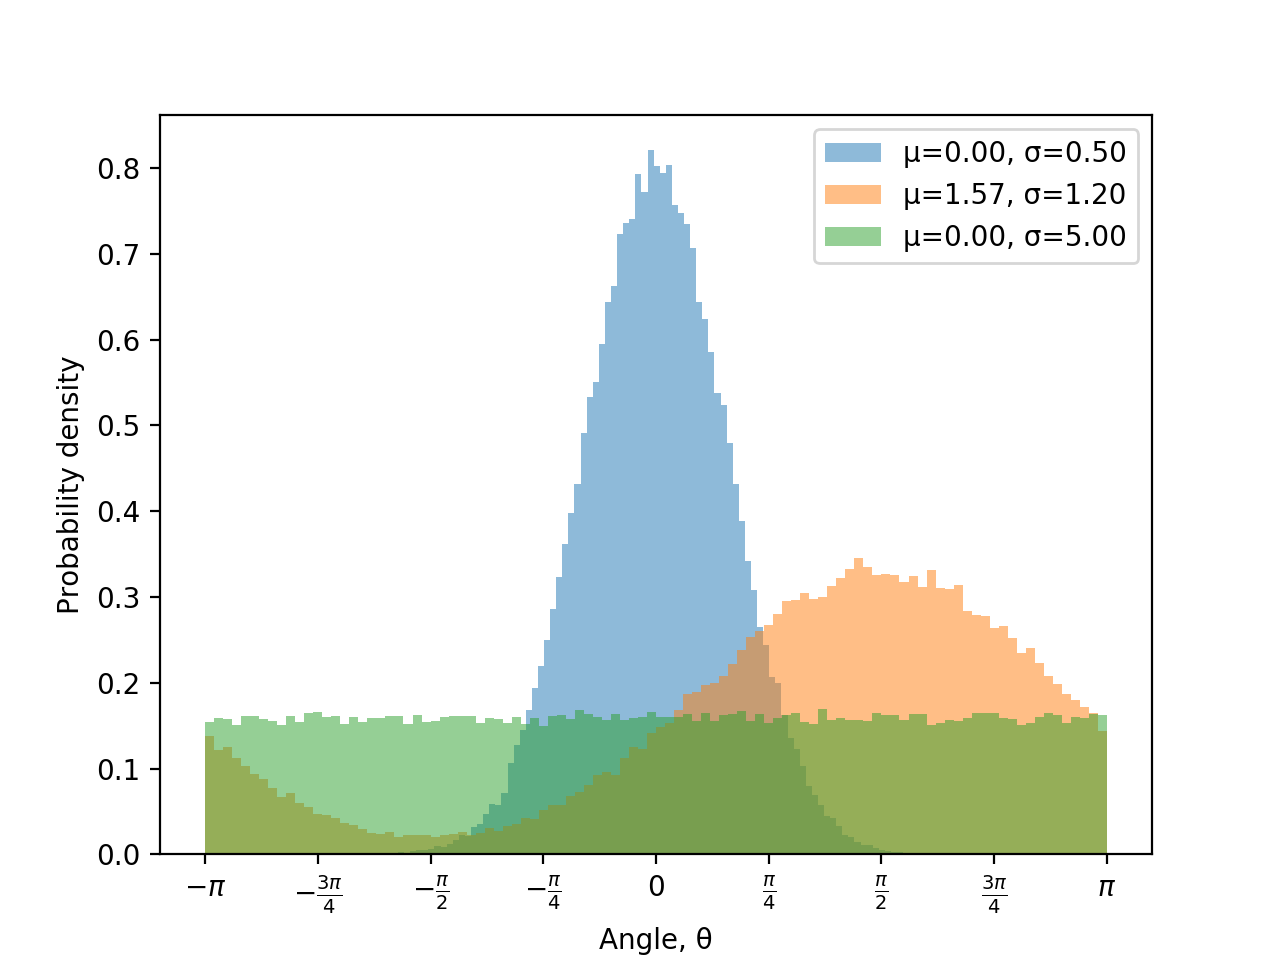

Text(0, 0.5, 'Probability density')

In [4]:
fig, ax = plt.subplots()
add_pi_ticks(ax)

for mu, sig in zip([0, np.pi/2, 0], [0.5, 1.2, 5]):
    sample = WrappedNormal(mu, sig).sample(100000)
    plt.hist(sample, bins=100, alpha=0.5, density=True, label='μ={:.2f}, σ={:.2f}'.format(mu, sig))

plt.legend()
plt.xlabel('Angle, θ')
plt.ylabel('Probability density')

## Plotting the probability density function

At a given time $t$, a cell has a well defined probability distribution over the angle it will take on the next step. This is 

$$
p_{\phi}(\alpha_t|\, \beta_t, \alpha_{t-1}) =   w \mathcal{N}_{\text{w}}(\alpha_t; \, \beta_t, \, \sqrt{-2\log b}) + (1-w) \mathcal{N}_{\text{w}}(\alpha_t; \, \alpha_{t-1}, \, \sqrt{-2\log p}) 
$$

The figure below allows you to edit the parameters $w$, $p$, $b$, $\beta_t$ and $\alpha_{t-1}$ to see what the resultant probability distribution looks like

<IPython.core.display.Javascript object>


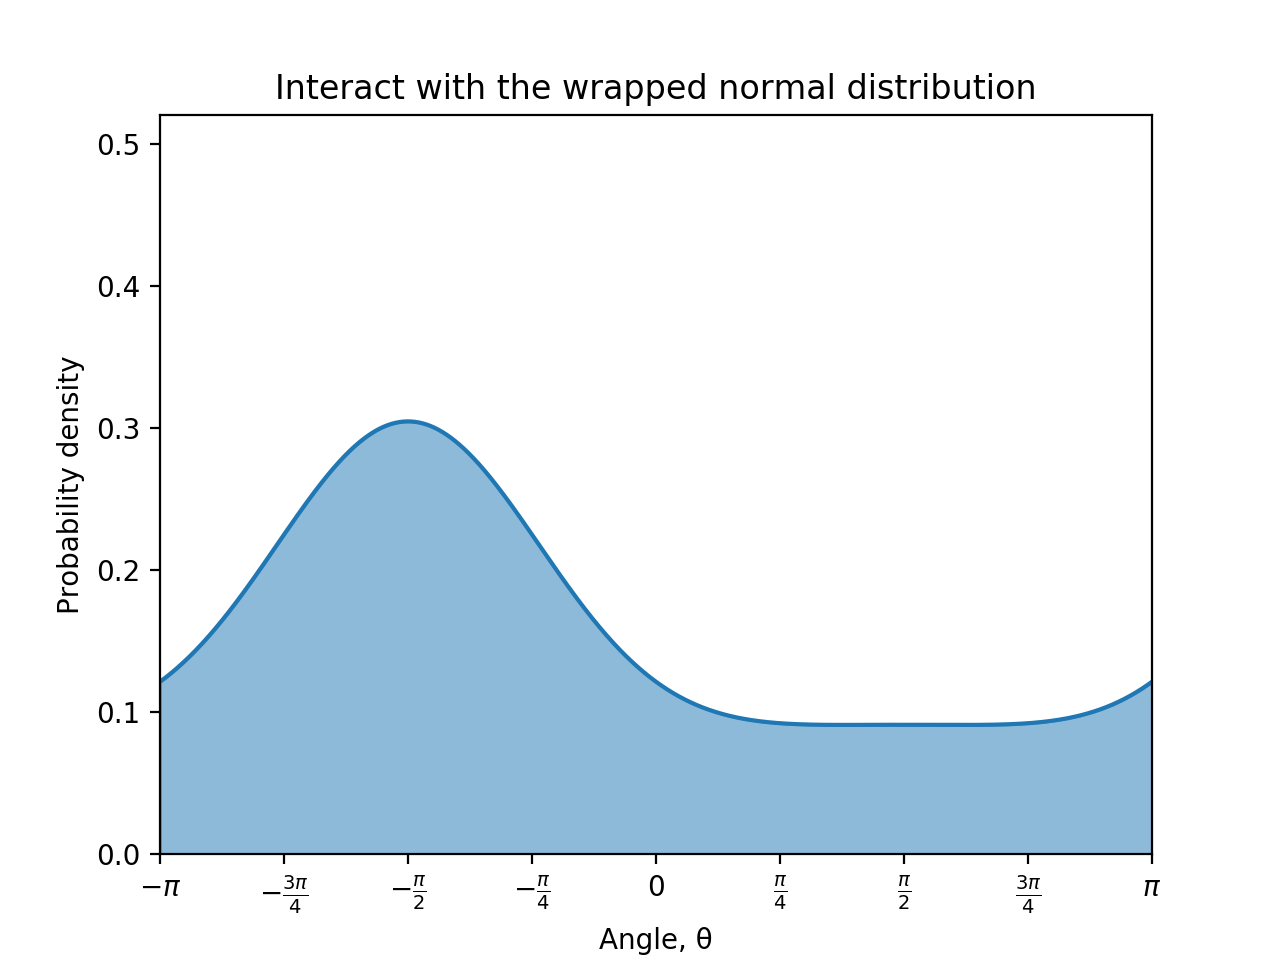

interactive(children=(FloatSlider(value=0.7, description='b', max=0.95, min=0.05, step=0.01), Output()), _dom_…

interactive(children=(FloatSlider(value=0.7, description='p', max=0.95, min=0.05, step=0.01), Output()), _dom_…

interactive(children=(FloatSlider(value=0.5, description='w', max=1.0, step=0.01), Output()), _dom_classes=('w…

interactive(children=(FloatSlider(value=-1.5707963267948966, description='alpha', max=3.141592653589793, min=-…

interactive(children=(FloatSlider(value=1.5707963267948966, description='beta', max=3.141592653589793, min=-3.…

In [5]:
distribution_b = WrappedNormal(mu=-1, sig=1.5)
distribution_p = WrappedNormal(mu=1, sig=1.5)
W = 0.5

theta = np.linspace(-np.pi, np.pi, 1000)

fig, ax = plt.subplots()
add_pi_ticks(ax)
plt.title('Interact with the wrapped normal distribution')
plt.xlabel('Angle, θ')
plt.ylabel('Probability density')

ax.set_ylim(0, 0.52)
ax.set_xlim(-np.pi, np.pi)
y = W * distribution_b.pdf(theta) + (1 - W) * distribution_p.pdf(theta)
line, = ax.plot(theta, y)
fill = ax.fill_between(theta, 0, y, alpha=0.5)

def update_y():
    global fill
    y = W * distribution_b.pdf(theta) + (1 - W) * distribution_p.pdf(theta)
    line.set_ydata(y)
    fill.remove()
    fill = ax.fill_between(theta, 0, y, alpha=0.5, color='#1f77b4')
    fig.canvas.draw_idle()

def update_b(b=0.7):
    distribution_b.sig = (- 2 * np.log(b)) ** 0.5
    update_y()
    
def update_p(p=0.7):
    distribution_p.sig = (- 2 * np.log(p)) ** 0.5
    update_y()
    
def update_w(w=0.5):
    global W
    W = w
    update_y()

def update_beta(beta=np.pi/2):
    distribution_b.mu = beta
    update_y()
    
def update_alpha(alpha=-np.pi/2):
    distribution_p.mu = alpha 
    update_y() 

interact(update_b, b=(0.05, 0.95, 0.01));
interact(update_p, p=(0.05, 0.95, 0.01));
interact(update_w, w=(0, 1, 0.01));
interact(update_alpha, alpha=(-np.pi, np.pi, 0.01));
interact(update_beta, beta=(-np.pi, np.pi, 0.01));


## Simluating biased-persistent trajectories

Here we use the definition stated above to sample some trajectories. 

<IPython.core.display.Javascript object>


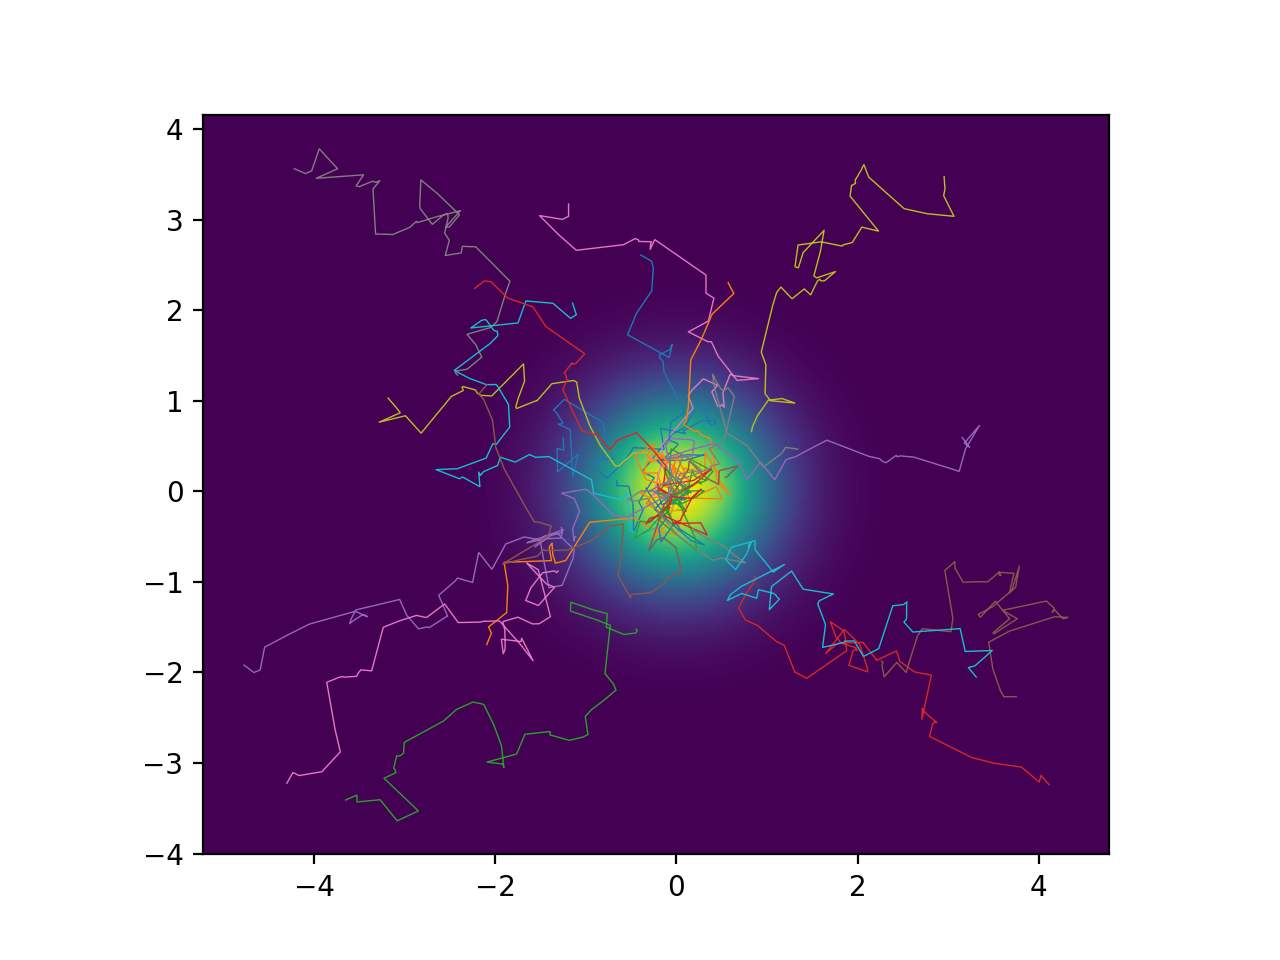

The paths object has shape (51, 2, 20): (T+1, [x, y], n_walkers)


In [6]:
from utils.distributions import Normal
from in_silico.walkers import BP_Leukocyte
from in_silico.sources import PointSource
from utils.plotting import plot_paths

# make a source (for the walkers to migrate towards) 
source = PointSource(position=np.array([0, 0]))

# instantiate a walker with parameters w=0.5, p=0.6, b=0.7
params = np.array([0.5, 0.6, 0.7])
walker = BP_Leukocyte(params, source)

# these are the starting positions of the leukocytes. Size must be of the form (N, 2)
X0s = np.random.uniform(-5, 5, size=(20, 2))
paths = walker.walk(X0s, T=50)

plot_paths(paths, source)
    
print('The paths object has shape {}: (T+1, [x, y], n_walkers)'.format(paths.shape))
